# Challenge 1
"Francesco wants to know which factors influence the value of a diamond: he is not an expert, he wants simple and clear messages. However, he trusts no one, and he hired another data scientist to get a second opinion on your work. Create a Jupyter notebook to explain what Francesco should look at and why. Your code should be understandable by a data scientist, but your text should be clear for a layman."

## Cleaning

> **Me:** Caro Francesco, I would like, before we start our work, to make some simple analysis on the dataset you handed me. I wan't to check if some of the information needs some cleaning before we star our analysis. Is that ok?

> **Francesco:** The data is just fine. Don't mess with my data. It took me many years to collect this information. You hear me!?

> **Me:** It's ok, it's ok. I won't modify anything you gave me. I will just check the consistency of the data and, if I find anything strange I will let you know and we will handle it together, ok?

> **Francersco:** OK, OK. Mi racommando...

I will proceed to do some checks on the data.

In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import SelectKBest, f_classif


import scipy.stats as st

In [59]:
data = pd.read_csv('../datasets/diamonds/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [60]:
print(data.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


> **Me:** As you can see from the previous snippets Francesco, carat, depth, table, x, y and z are numerical variables and 'cut', 'color', 'clarity' are what we call cathegorical variables: they can only have a finite number of possible values which in this case are the texts representing the cuts, colors and clarities.

> **Francesco:** Yes I understand that.

> **Me:** Moreover, the cathegorical 'cut', 'color', and 'clarity' are what we call ordinal variables, since the cathegories can be ordered. For example you know that the color letter describe colors which go from absolutely colorless, to light yellow.

> **Francesco:** I agree. I am afraid you are explaining me things too well. I don't understand if that means you are a good teacher or it means you consider me pretty stupid. Be careful.

We separate numerical and cathegorical variables column names:

In [61]:
cath_columns = list(data.select_dtypes(include=[object]).columns)
print(cath_columns)
num_columns = list(data.select_dtypes(exclude=[object]).columns)
print(num_columns)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


> **Me:** In the cathalog you gave me it said that I should find the values `['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']` for the cut, the values `['D', 'E', 'F', 'G', 'H', 'I', 'J']` for the color, and `['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1' ]` for the clarity. And that those are the order of the cathegories for cut, color and clarity. So we will define the ordered cathegories dictionary, for future use, and we will check if in your 5000 diamonds dataset, the values for the cathegorical variables are only those values you told me I would find in the dataset.

> **Francesco:** What do you mean? You don't trust me??!!!

> **Me:** Yes!! Don't get mad. I trust you. But one should always be sure no mistakes were made during the data entry process.

In [62]:
ordered_cathegories = {'cut': ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'],
                       'color': ['D', 'E', 'F', 'G', 'H', 'I', 'J'], 
                       'clarity': ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1' ]}

In [63]:
for col in cath_columns:
  print(col+": ", end= "")
  print(data[col].unique())

cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color: ['H' 'I' 'F' 'G' 'E' 'D' 'J']
clarity: ['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


> **Me:** So we see that, as expected, the values we see in the cut, color and clarity columns are just the values, all the values, and only the values you told me I would find.

> **Francesco:** I told you so.

> **Me:** Let us make a simple statistical description of all the other columns, the numerical ones.

> **Francesco:** What do you mean?

> **Me:** You'll see.

In [64]:
data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


> **Me:** Mmm. This is worrisome, you see, I am seeing that for column `price`, the minimum is `-1`. Moreover you can also see that the minimum for `x`, `y` and `z` is zero. Those are unacceptable values. I was hoping to obtain all positive numerical values for these columns.

> **Francesco:** Ups, you are right. I must have screwed up somewhere. How big is the problem? How many diamonds have this strange information?

> **Me:** Let's see

In [65]:
data[data['price']<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [66]:
data[data['z']<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


> **Me:** From the previous snippets you can see that we have 10 diamonds which were classified with `price = -1` and one diamond with zero coordinates. What do you think we should do with these?

> **Francesco:** The 10 with negative price, just drop them. I just want to know what influences price so these 10 entries won't do for that kind of explanation. The one with missing coordinates we could keep it, it might have relevant information we wouldn't want to miss, I think. On the oher hand, it having incosistent number for its coordinates makes me wonder if the other information about it might be corrupt. It being only one.... just drop it. We don't miss much.

> **Me:** Ok.

In [69]:
data = data[(data['z']>0) & (data['price']>0)].reset_index(drop= True)
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,Ideal,H,VVS1,61.2,57.0,655,4.30,4.39,2.66


## Correlation

In [68]:
data_enc = data.copy()

myenc = OrdinalEncoder(categories = list(ordered_cathegories.values()))

myenc.fit(data[cath_columns])

data_enc[cath_columns] = myenc.transform(X=data_enc[cath_columns])#, columns = cath_columns)
#data_enc[num_columns] = data[num_columns]
#data2[cath_columns] = pd.DataFrame(myenc.transform(X=data2[cath_columns]), columns = cath_columns)


In [72]:
data_enc.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,0.0,4.0,2.0,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,1.0,3.0,2.0,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,0.0,6.0,2.0,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,1.0,2.0,4.0,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,0.0,4.0,1.0,61.2,57.0,655,4.30,4.39,2.66


<Axes: >

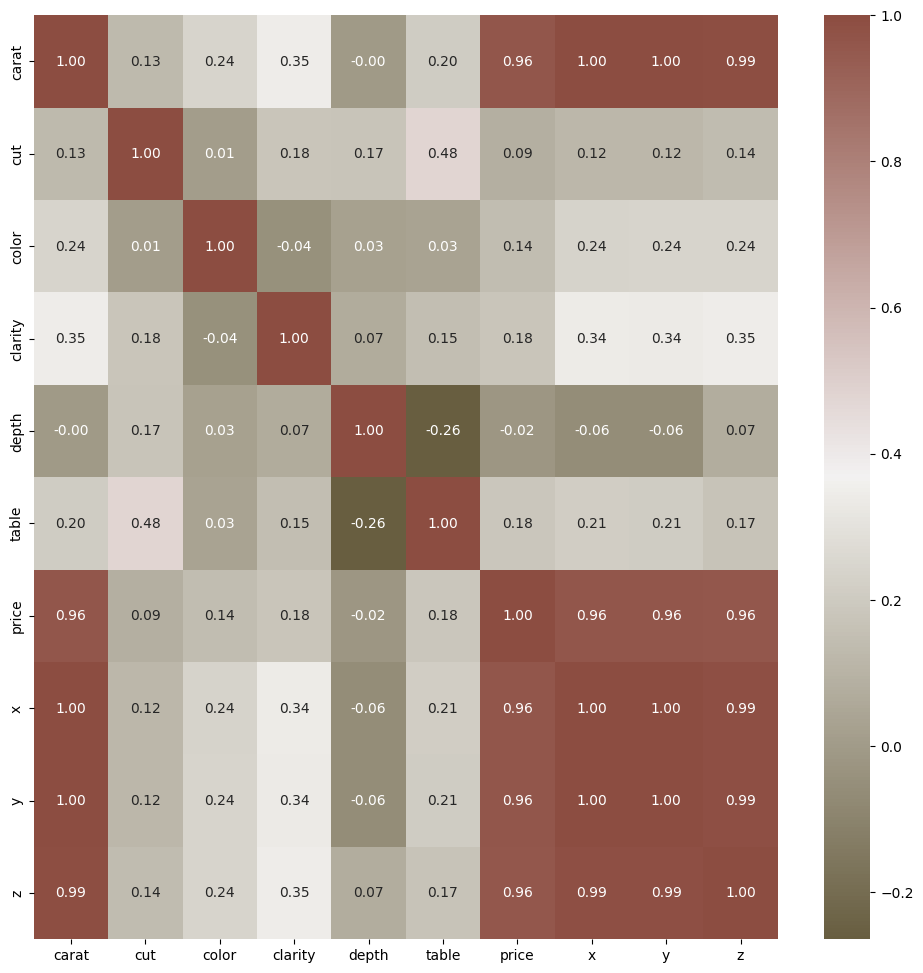

In [73]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
#corrmat= data2.corr()
corrmat= data_enc.corr(method='spearman')
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corrmat,cmap=cmap,annot=True, fmt='.2f', cbar=True)

## Geometry

In [76]:
X = (data2['carat']*200/3.52)/((1/3)*(data2['x'])*(data2['y'])*(data2['z']))
X.describe()


count    4989.000000
mean        1.044374
std         0.037734
min         0.528494
25%         1.030961
50%         1.042308
75%         1.054933
max         3.229639
dtype: float64

In [83]:
interval = st.t.interval(confidence = 0.95, df=len(X)-1, loc = X.mean(), scale = X.std())
interval

(0.9703999161760964, 1.1183485776765443)

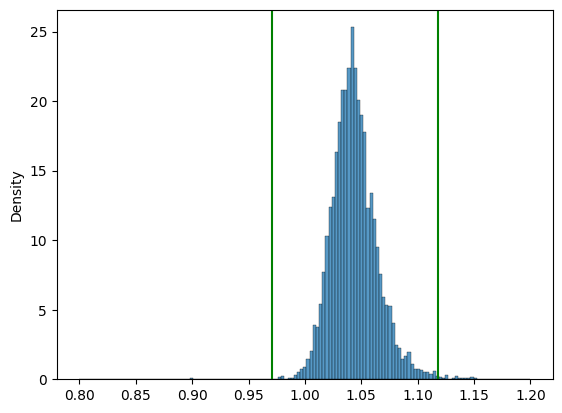

In [98]:
ax = sns.histplot(X, binrange=(0.8,1.2),stat ='density')
ax.axvline(x = interval[0],    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 300, color = 'green') # Top of the plot
ax.axvline(x = interval[1],    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 300, color = 'green') # Top of the plot
x = np.linspace(0.8, 1.2, 1000)



count    4989.000000
mean        0.931959
std         0.056454
min         0.715000
25%         0.898679
50%         0.923509
75%         0.955874
max         2.885390
dtype: float64


<Axes: ylabel='Count'>

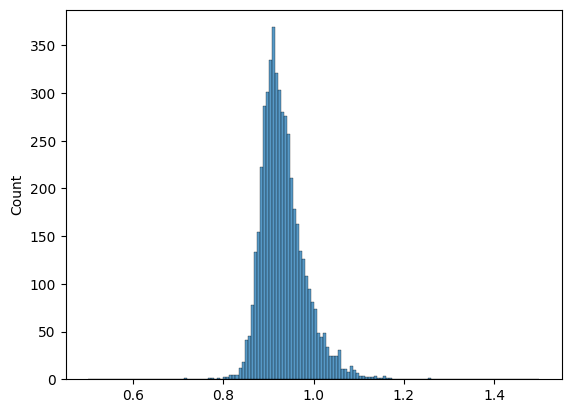

In [100]:
X = data2['table']/((data2['z']*200)/(data2['x']+data2['y']))
print(X.describe())
sns.histplot(X,binrange=(0.5,1.5))

In [42]:
Y = np.log(data2['price'])
Y.describe()

count    4989.000000
mean        7.783717
std         1.019371
min         5.860786
25%         6.848005
50%         7.782390
75%         8.589700
max         9.840920
Name: price, dtype: float64

## Cathegorical variables and price

In [75]:
from matplotlib import rcParams

In [113]:
[cathegory[:3] for cathegory in ordered_cathegories['cut']]

['Ide', 'Pre', 'Ver', 'Goo', 'Fai']

Text(0, 0.5, '')

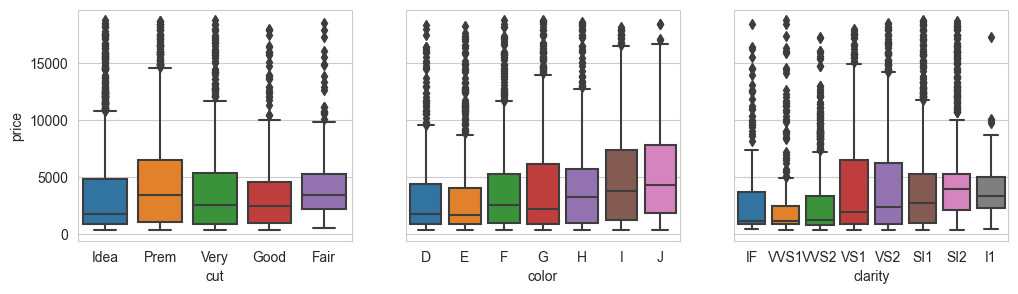

In [120]:
rcParams['figure.figsize'] = 12, 3

sns.set_style("whitegrid")
figure, axis = plt.subplots(1,3, sharey=True)

sns.boxplot(ax = axis[0], x = 'cut',y = 'price', data = data, order=ordered_cathegories['cut'])
sns.boxplot(ax = axis[1], x = 'color',y = 'price', data = data, order=ordered_cathegories['color'])
sns.boxplot(ax = axis[2], x = 'clarity',y = 'price', data = data, order=ordered_cathegories['clarity'])
axis[0].set_ylabel('price')
axis[0].set_xticklabels([cathegory[:4] for cathegory in ordered_cathegories['cut']])
axis[1].set_ylabel(None)
axis[2].set_ylabel(None)


## Trends

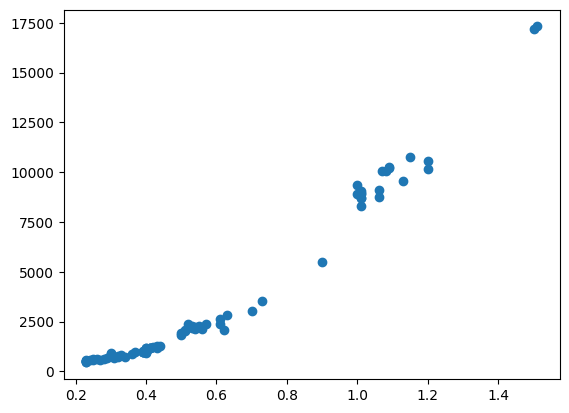

In [55]:
X_ = data2[(data2['color']==2)&(data2['clarity']==2)]['carat']
Y_ = data2[(data2['color']==2)&(data2['clarity']==2)]['price']
plt.scatter(X_, Y_)

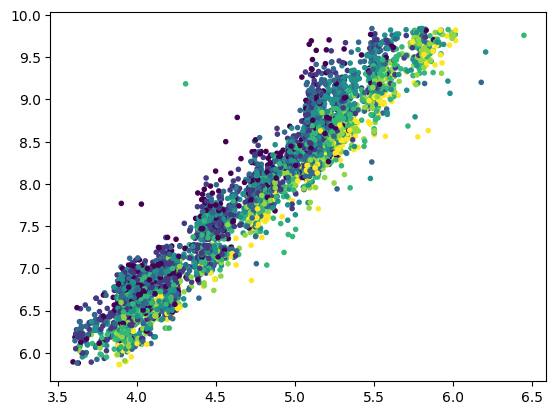

In [68]:
#plt.xlim(-1.9,-1.7)
plt.scatter(x= np.log(data2['x']*data2['y']*data2['z']/((data2['x']**2+data2['y']**2+data2['z']**2)**0)), y = np.log(data2['price']), c = data2['color'], marker = '.')

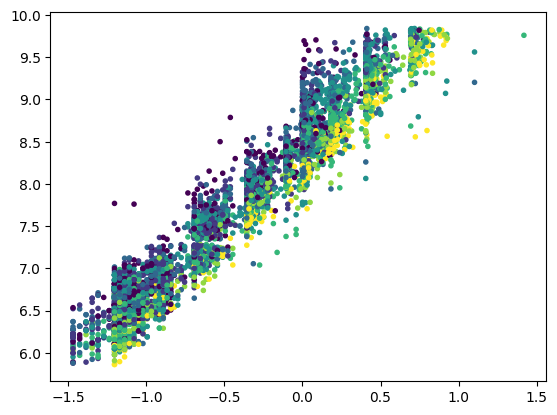

In [69]:
plt.scatter(x= np.log(data2['carat']), y = np.log(data2['price']), c = data2['color'], marker = '.')

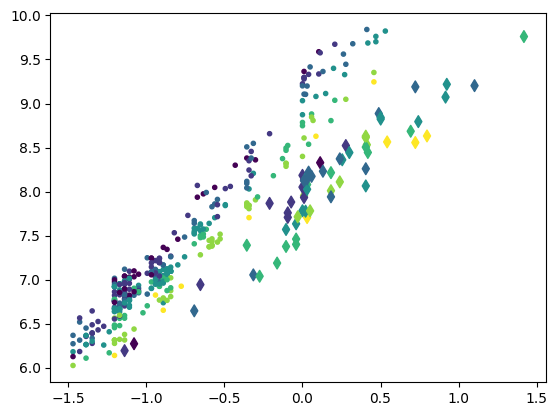

In [52]:
#plt.xlim(-1.9,-1.7)

data3= data2[data2['clarity']==7]
plt.scatter(x= np.log(data3['carat']), y = np.log(data3['price']), c = data3['color'], marker = 'd')
data3= data2[data2['clarity']==1]
plt.scatter(x= np.log(data3['carat']), y = np.log(data3['price']), c = data3['color'], marker = '.')